In [1]:
import torch, os
print(torch.__version__)
print(torch.__file__)


2.7.0+cu128
c:\Users\Dan\Anaconda3\envs\deeplearn\Lib\site-packages\torch\__init__.py


Number of unique classes per dataset:
dataset
7point      7
ISIC2019    8
PAD20       6
Name: label, dtype: int64


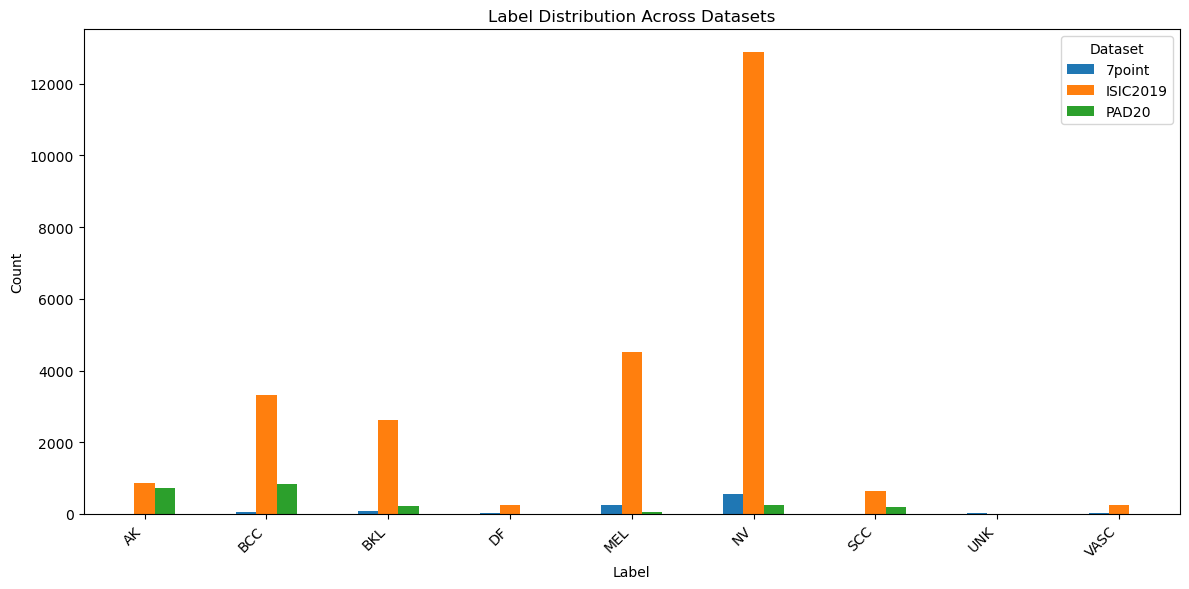

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("splits/training/labels.csv")
# Calculate label counts per dataset
# Group by dataset and label, count occurrences, and unstack to get datasets as columns
label_counts_per_dataset = df.groupby(['label', 'dataset']).size().unstack(fill_value=0)

# Calculate the number of unique classes (labels) per dataset
class_count_per_dataset = df.groupby('dataset')['label'].nunique()

# Print the number of classes per dataset
print("Number of unique classes per dataset:")
print(class_count_per_dataset)

# Plot the grouped bar chart
ax = label_counts_per_dataset.plot(kind='bar', figsize=(12, 6)) # Adjust figsize as needed

# Add title and labels
plt.title('Label Distribution Across Datasets')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title='Dataset')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [8]:
# Calculate the total number of images per dataset
image_count_per_dataset = df.groupby('dataset').size()

# Print the total number of images per dataset
print("Total number of images per dataset:")
print(image_count_per_dataset)

# Print the label count per dataset
print("\nLabel count per dataset:")
print(label_counts_per_dataset)

Total number of images per dataset:
dataset
7point       1010
ISIC2019    25331
PAD20        2298
dtype: int64

Label count per dataset:
dataset  7point  ISIC2019  PAD20
label                           
AK            0       867    730
BCC          42      3323    845
BKL          85      2624    235
DF           20       239      0
MEL         251      4522     52
NV          569     12875    244
SCC           0       628    192
UNK          14         0      0
VASC         29       253      0


In [9]:
df_testing = pd.read_csv("splits/testing/labels_testing.csv")

# Calculate label counts for testing data
label_counts_testing = df_testing.groupby('label').size()

# Print the label counts for testing data
print("Label count for testing data:")
print(label_counts_testing)

Label count for testing data:
label
AK       374
BCC      975
BKL      660
DF        91
MEL     1327
NV      2495
SCC      165
UNK     2047
VASC     104
dtype: int64


In [10]:
import torch
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version PyTorch was compiled with: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(torch.cuda.current_device())}")

PyTorch Version: 2.7.0+cu128
CUDA available: True
CUDA version PyTorch was compiled with: 12.8
Number of GPUs: 1
Current CUDA device: 0
Device name: NVIDIA GeForce RTX 5060 Ti


In [11]:
import ctypes, os
dll_path = os.path.join(os.environ['CUDA_PATH'], 'extras', 'CUPTI', 'lib64', 'cupti64_2025.2.0.dll')
ctypes.WinDLL(dll_path)
print("Loaded CUPTI successfully")


Loaded CUPTI successfully
